Mounting Google Drive

In [1]:
from google.colab import  drive
import os
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CAPSTONE//
#DATA_PATH = '/content/drive/MyDrive/CAPSTONE/ArticlesText.csv'
#pickles_folder = os.listdir(DATA_PATH)

Mounted at /content/drive
/content/drive/MyDrive/CAPSTONE


Importing Neccessary Libraries

In [2]:
import numpy as np 
import pandas as pd 
import os, json
import glob
import csv

Creating a dataframe with text from ArticlesText.csv file

In [3]:
import io
#read_covidarticles = pd.read_csv(io.BytesIO(uploaded['ArticlesText.csv']))
read_covidarticles = pd.read_csv("ArticlesText.csv")

Example of an Article

In [11]:
txt = read_covidarticles['body_text']

print(read_covidarticles['authors'][2],'\n',read_covidarticles['authors'][2],'\n', read_covidarticles['body_text'][2])

Hancková, Miriam; Betáková, Tatiana 
 Introduction

Changes in host population ecology, genetic mutations in pathogen reservoirs, the lack of disease control, the growing population, overcrowded urban areas, climate change, and globalization have resulted in the development of several epidemics and two pandemics in the 20th and 21st centuries. Due to the advances in medical science, raising awareness of the risk factors, educating people, and adopting safety measures, the severe acute respiratory syndrome (SARS) outbreak in China (2002) . This H1N1 strain of influenza virus had not circulated previously in the human population and was entirely new [1] . The virus was contagious, spread easily from one person to another, and replaced the seasonal H1N1 virus, which was, by then, circulating in the population. The novel (H1N1)pdm09 virus preferentially infected younger people and most cases of severe and fatal infection appeared in adults aged between 30 and 50 years [2] . The researchers

**STEP 1. NLP process**

In this section we make use of Natural Language Processing steps such as removing stopwords, lemmatization etc. to process the data.

In [4]:
import nltk

from nltk.corpus import stopwords
from nltk.stem import  WordNetLemmatizer

import spacy

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [5]:
stop_words=stopwords.words('english')
additional_words = ['not','they','would','shall','might','could','v','qpr','snp','"','– ','did','said','says','say','want','know',
                    'doi', 'preprint', 'copyright', 'org', 'https', 'et', 'al', 'author', 'figure', 'table',
    'rights', 'reserved', 'permission', 'use', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 'al.', 'Elsevier', 'PMC', 'CZI',
    '-PRON-', 'usually', 'et','al'
    r'\usepackage{amsbsy', r'\usepackage{amsfonts', r'\usepackage{mathrsfs', r'\usepackage{amssymb', r'\usepackage{wasysym',
    r'\setlength{\oddsidemargin}{-69pt',  r'\usepackage{upgreek', r'\documentclass[12pt]{minimal']
for aw in additional_words:
  stop_words.append(aw)
lemmatizer = WordNetLemmatizer()
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
import seaborn as sns
import re,random
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [7]:
import string


In this code block we define the functions to clean and preprocess the data

In [8]:
def lowercase_all(s):
  return s.lower()

def replace_unnecessary_chars(s):
    text = lowercase_all(s)
    text = re.sub('\w*\d\w*','', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r"\n\\x",'', text)
    return text

def remove_stop_words(s,stopwords):
    words = [word for word in s.split() if word.lower() not in stopwords]
    modern_txt = " ".join(words)
    return modern_txt

def text_cleaning(s,stopwords):
    lowered = lowercase_all(s)
    cleaned = remove_stop_words(lowered,stopwords)
    final_text = replace_unnecessary_chars(cleaned)
    return final_text

def sentence_tokenization(s):
    return nltk.tokenize.sent_tokenize(s)

def word_tokenization(s):
    return nltk.tokenize.word_tokenize(s)

def lemmatization_process(s):
    token_words = word_tokenization(s)
    sentence_lemma = []
    for word in token_words:
      sentence_lemma.append(lemmatizer.lemmatize(word))
    return " ".join(sentence_lemma)
  
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations




In [9]:
def eda_process_steps(col):
  read_covidarticles[col] = read_covidarticles[col].apply(lambda x : text_cleaning(x,stop_words))
  read_covidarticles[col] = read_covidarticles[col].apply(lambda x : lemmatization_process(x))
  return read_covidarticles[col]

read_covidarticles['body_text'] = eda_process_steps('body_text').copy()

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

**STEP 2. Analysis and visualization of Data**

In the following code block we calculate sentence count, word count, character count and respective densities of each article.

In [11]:
read_covidarticles['text_sent_count'] = read_covidarticles['body_text'].apply(lambda x: len(sentence_tokenization(x)))
read_covidarticles['text_word_count']= read_covidarticles['body_text'].apply(lambda x: len(word_tokenization(x)))
read_covidarticles['text_char_count']= read_covidarticles['body_text'].apply(lambda x: len(x.replace(" ","")))
read_covidarticles['text_word_density'] = read_covidarticles['text_word_count'] / (read_covidarticles['text_char_count'] + 1)
read_covidarticles['text_sent_density'] = read_covidarticles['text_sent_count'] / (read_covidarticles['text_word_count'] + 1)
read_covidarticles['sent_word_count'] = read_covidarticles['text_word_count']/read_covidarticles['text_sent_count']

Generate top 20 words in the Articles

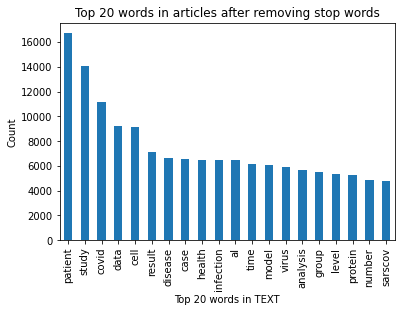

In [12]:
common_words = get_top_n_words(read_covidarticles['body_text'], 20)
df2 = pd.DataFrame(common_words, columns = ['Reviewtext' , 'count'])

df2.groupby('Reviewtext').sum()['count'].sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Top 20 words in TEXT')
plt.title('Top 20 words in articles after removing stop words')
plt.show()

In [13]:
# Following functions have been referenced from - https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad

def plot_boxplots(data, plot_vars, labels, figsize):
    ''' Plot a box-plot of the variables in the plot_vars list using the labels and a size of figesize
        Input:
        - data: a dataframe, containing the data points to plot
        - plot_vars: a (1,x) array, containig the columns to plot
        - labels: a dictionary, to map the column names to its label
        - figsize: a tuple, indicating the size of the figure
    '''
    
   # We need to identify is this a matrix or a vector
    if plot_vars.ndim == 1:
        nrows=1
        ncols = plot_vars.shape[0]
    else:
        nrows= plot_vars.shape[0]
        ncols = plot_vars.shape[1]
    
    print(nrows,ncols)

    #Create a figure and its axes for the dimensions defined
    f, axes = plt.subplots(nrows, ncols, sharey=False, figsize=(15,5))
    #For every variable in the plot_vars
    for i in range(nrows):
        for j in range(ncols):
            # If the column name is defined we plot it
            if plot_vars[i,j]!=None:
                if axes.ndim>1:
                    #Set the title
                    axes[i,j].set_title(labels[plot_vars[i,j]])
                    axes[i,j].grid(True)
                    #Set x ticks
                    axes[i,j].tick_params(
                        axis='x',          # changes apply to the x-axis
                        which='both',      # both major and minor ticks are affected
                        bottom=False,      # ticks along the bottom edge are off
                        top=False,         # ticks along the top edge are off
                        labelbottom=False)
                    # Plot a boxplot for the column in plot_vars
                    axes[i,j].boxplot(data[plot_vars[i,j]])
                else:
                    #Set the title
                    axes[j].set_title(labels[plot_vars[i,j]])
                    axes[j].grid(True)
                    #Set x ticks
                    axes[j].tick_params(
                        axis='x',          # changes apply to the x-axis
                        which='both',      # both major and minor ticks are affected
                        bottom=False,      # ticks along the bottom edge are off
                        top=False,         # ticks along the top edge are off
                        labelbottom=False)
                    # Plot a boxplot for the column in plot_vars
                    axes[j].boxplot(data[plot_vars[i,j]])
                
            else:
                axes[i,j].set_visible(False)
    # Adjust the plots for a better visualization
    f.tight_layout()
    plt.show() 


def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def plot_histograms(data, plot_vars, xlim, labels, figsize):
    ''' Function to plot the histograms of the variables in plot_vars
        Input:
        - data: a dataframe, containing the data points to plot
        - plot_vars: a (1,x) array, containig the columns to plot
        - xlim: a list, define the max x value for every column to plot
        - labels: a dictionary, to map the column names to its label
        - figsize: a tuple, indicating the size of the figure
    '''
    #Set some parameters
    kwargs = dict(hist_kws={'alpha':.7}, kde_kws={'linewidth':2})

    #cmap = get_cmap(plot_vars.shape[1])
    # Create the figure and axes
    fig, axes = plt.subplots(plot_vars.shape[0], plot_vars.shape[1], figsize=figsize, sharey=False, dpi=100)
    #For every variable in plot_vars
    for i in range(plot_vars.shape[1]):
        # Plot the histogram 
        sns.distplot(data[plot_vars[0,i]] , color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1),), 
                     ax=axes[i], axlabel=labels[plot_vars[0,i]], bins= 50, norm_hist = True)
        #For a better visualization we set the x limit
        axes[i].set_xlim(left=0, right=xlim[i])
        
    fig.tight_layout()

In [14]:
labels_dict={'text_word_count': 'Word Count of Texts',
             'text_char_count': 'Char Count of Texts',
             'text_word_density': 'Word Density of Texts',
             'text_sent_density': 'Sentence Density of Texts',
             
             'text_sent_count': 'Sentence Count of Texts', 
             
             'text_stp_count': 'Stopwords Count of Texts'
           ,}

1 5


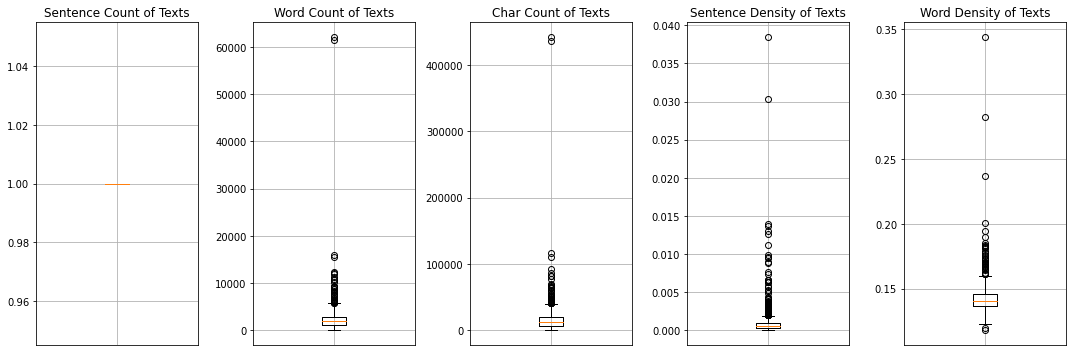

In [15]:
plot_vars=np.array([['text_sent_count', 'text_word_count', 'text_char_count','text_sent_density','text_word_density']])
plot_boxplots(read_covidarticles, plot_vars, labels_dict, figsize=(10,3))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWar

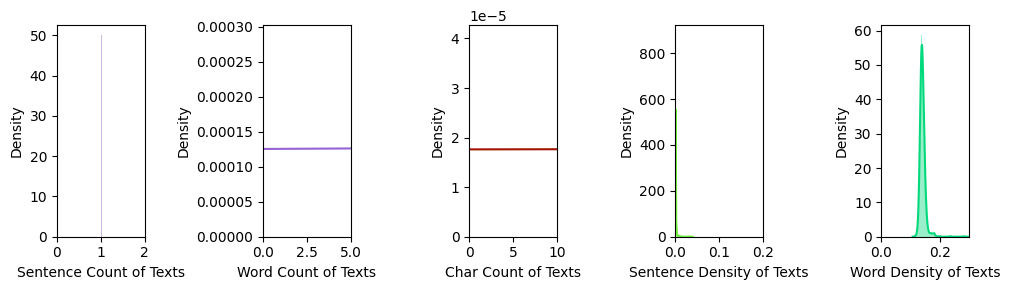

In [38]:
plot_histograms(read_covidarticles, plot_vars, [2, 5, 10, 0.2, 0.3], labels_dict, figsize=(10,3))

Generate word cloud

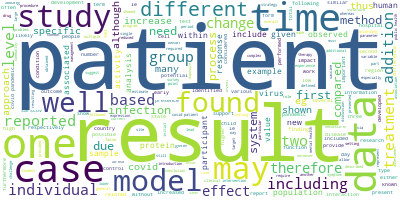

In [39]:
from wordcloud import WordCloud
long_string = ','.join(list(read_covidarticles['body_text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

**STEP 3. Topic Modelling using Latent Dirichlet Allocation (LDA) model**

In [16]:
def sent_to_words(sentences):
    for sentence in sentences:
          yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = read_covidarticles.body_text.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['introduction', 'giardia', 'intestinalis', 'tritrichomonas', 'foetus', 'frequent', 'ubiquitous', 'enteric', 'protozoan', 'affecting', 'domestic', 'cat', 'gookin', 'gruffyddjones', 'slapeta', 'parasite', 'worldwide', 'distribution', 'owned', 'cat', 'feng', 'xiao', 'yao', 'koster', 'intestinalis', 'wellknown', 'parasite', 'small', 'intestine', 'veterinarian']


In [17]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_words)
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 3), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 3), (13, 1), (14, 1), (15, 2), (16, 2), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 13), (27, 2), (28, 2), (29, 2)]


In [18]:
from pprint import pprint
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"patient" + 0.007*"study" + 0.005*"covid" + 0.005*"also" + '
  '0.004*"cell" + 0.004*"may" + 0.003*"data" + 0.003*"model" + '
  '0.003*"treatment" + 0.003*"two"'),
 (1,
  '0.007*"study" + 0.005*"covid" + 0.005*"patient" + 0.004*"cell" + '
  '0.004*"also" + 0.003*"infection" + 0.003*"case" + 0.003*"result" + '
  '0.003*"health" + 0.003*"effect"'),
 (2,
  '0.006*"study" + 0.006*"patient" + 0.006*"covid" + 0.004*"cell" + '
  '0.004*"data" + 0.004*"also" + 0.003*"may" + 0.003*"time" + 0.003*"health" + '
  '0.003*"result"'),
 (3,
  '0.009*"patient" + 0.005*"study" + 0.004*"covid" + 0.004*"also" + '
  '0.004*"infection" + 0.004*"result" + 0.003*"data" + 0.003*"may" + '
  '0.003*"time" + 0.003*"value"'),
 (4,
  '0.008*"patient" + 0.006*"study" + 0.005*"data" + 0.004*"covid" + '
  '0.003*"time" + 0.003*"de" + 0.003*"one" + 0.003*"model" + 0.003*"case" + '
  '0.003*"result"'),
 (5,
  '0.007*"study" + 0.006*"cell" + 0.005*"patient" + 0.005*"data" + '
  '0.004*"model" + 0.004*"disea

In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords

In [19]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    sent_topics_df = pd.DataFrame()

   
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
       
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Percentage Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)


df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.9996,"patient, study, covid, also, infection, result...","[introduction, giardia, intestinalis, tritrich..."
1,1,0.0,0.9940,"patient, study, covid, also, cell, may, data, ...","[neurosurgical, training, challenged, rigorous..."
2,2,5.0,0.8872,"study, cell, patient, data, model, disease, vi...","[introduction, change, host, population, ecolo..."
3,3,6.0,0.3872,"patient, study, data, may, cell, result, covid...","[introduction, current, covid, pandemic, strai..."
4,4,7.0,0.9254,"patient, cell, study, also, covid, result, dat...","[introduction, heparin, second, widely, drug, ..."
5,5,7.0,0.7423,"patient, cell, study, also, covid, result, dat...","[keywords, sarscov, omicron, variant, rapid, a..."
6,6,7.0,0.7334,"patient, cell, study, also, covid, result, dat...","[impulsive, model, proposed, fractional, calcu..."
7,7,8.0,0.4559,"covid, patient, study, data, also, cell, case,...","[introduction, since, turn, century, public, h..."
8,8,8.0,0.6859,"covid, patient, study, data, also, cell, case,...","[introduction, selfmanagement, health, essenti..."
9,9,5.0,0.9990,"study, cell, patient, data, model, disease, vi...","[introduction, plausible, sarscov, depends, cl..."


By plotting the document word count distribution will tell us how big the documents are and respective statistics

1000


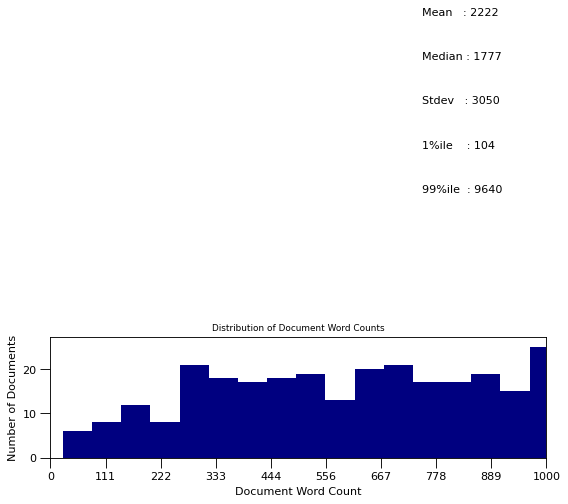

In [27]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

plt.figure(figsize=(8,2), dpi=80)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=9)
plt.xticks(np.linspace(0,1000,10))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=8))
plt.show()

Word clouds of top keywords in each topic

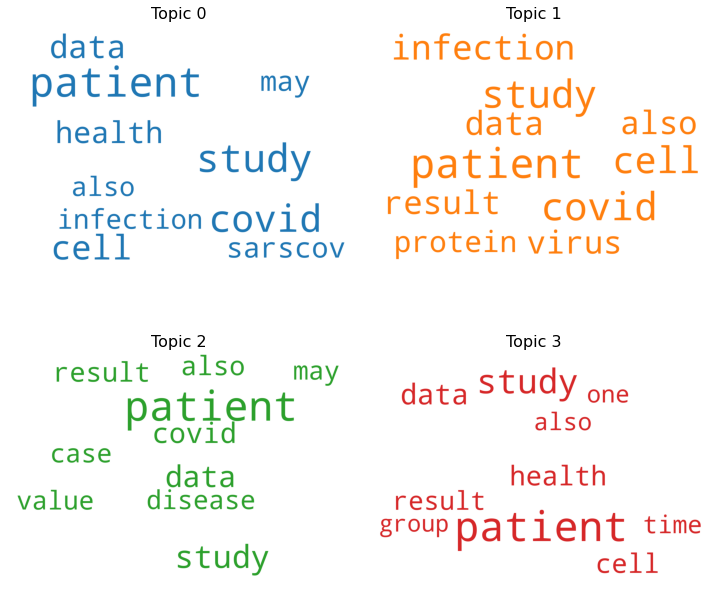

In [54]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In the following code block we calculate the importance (weights) of the keywords and how frequently the words have appeared in the documents in the topics.

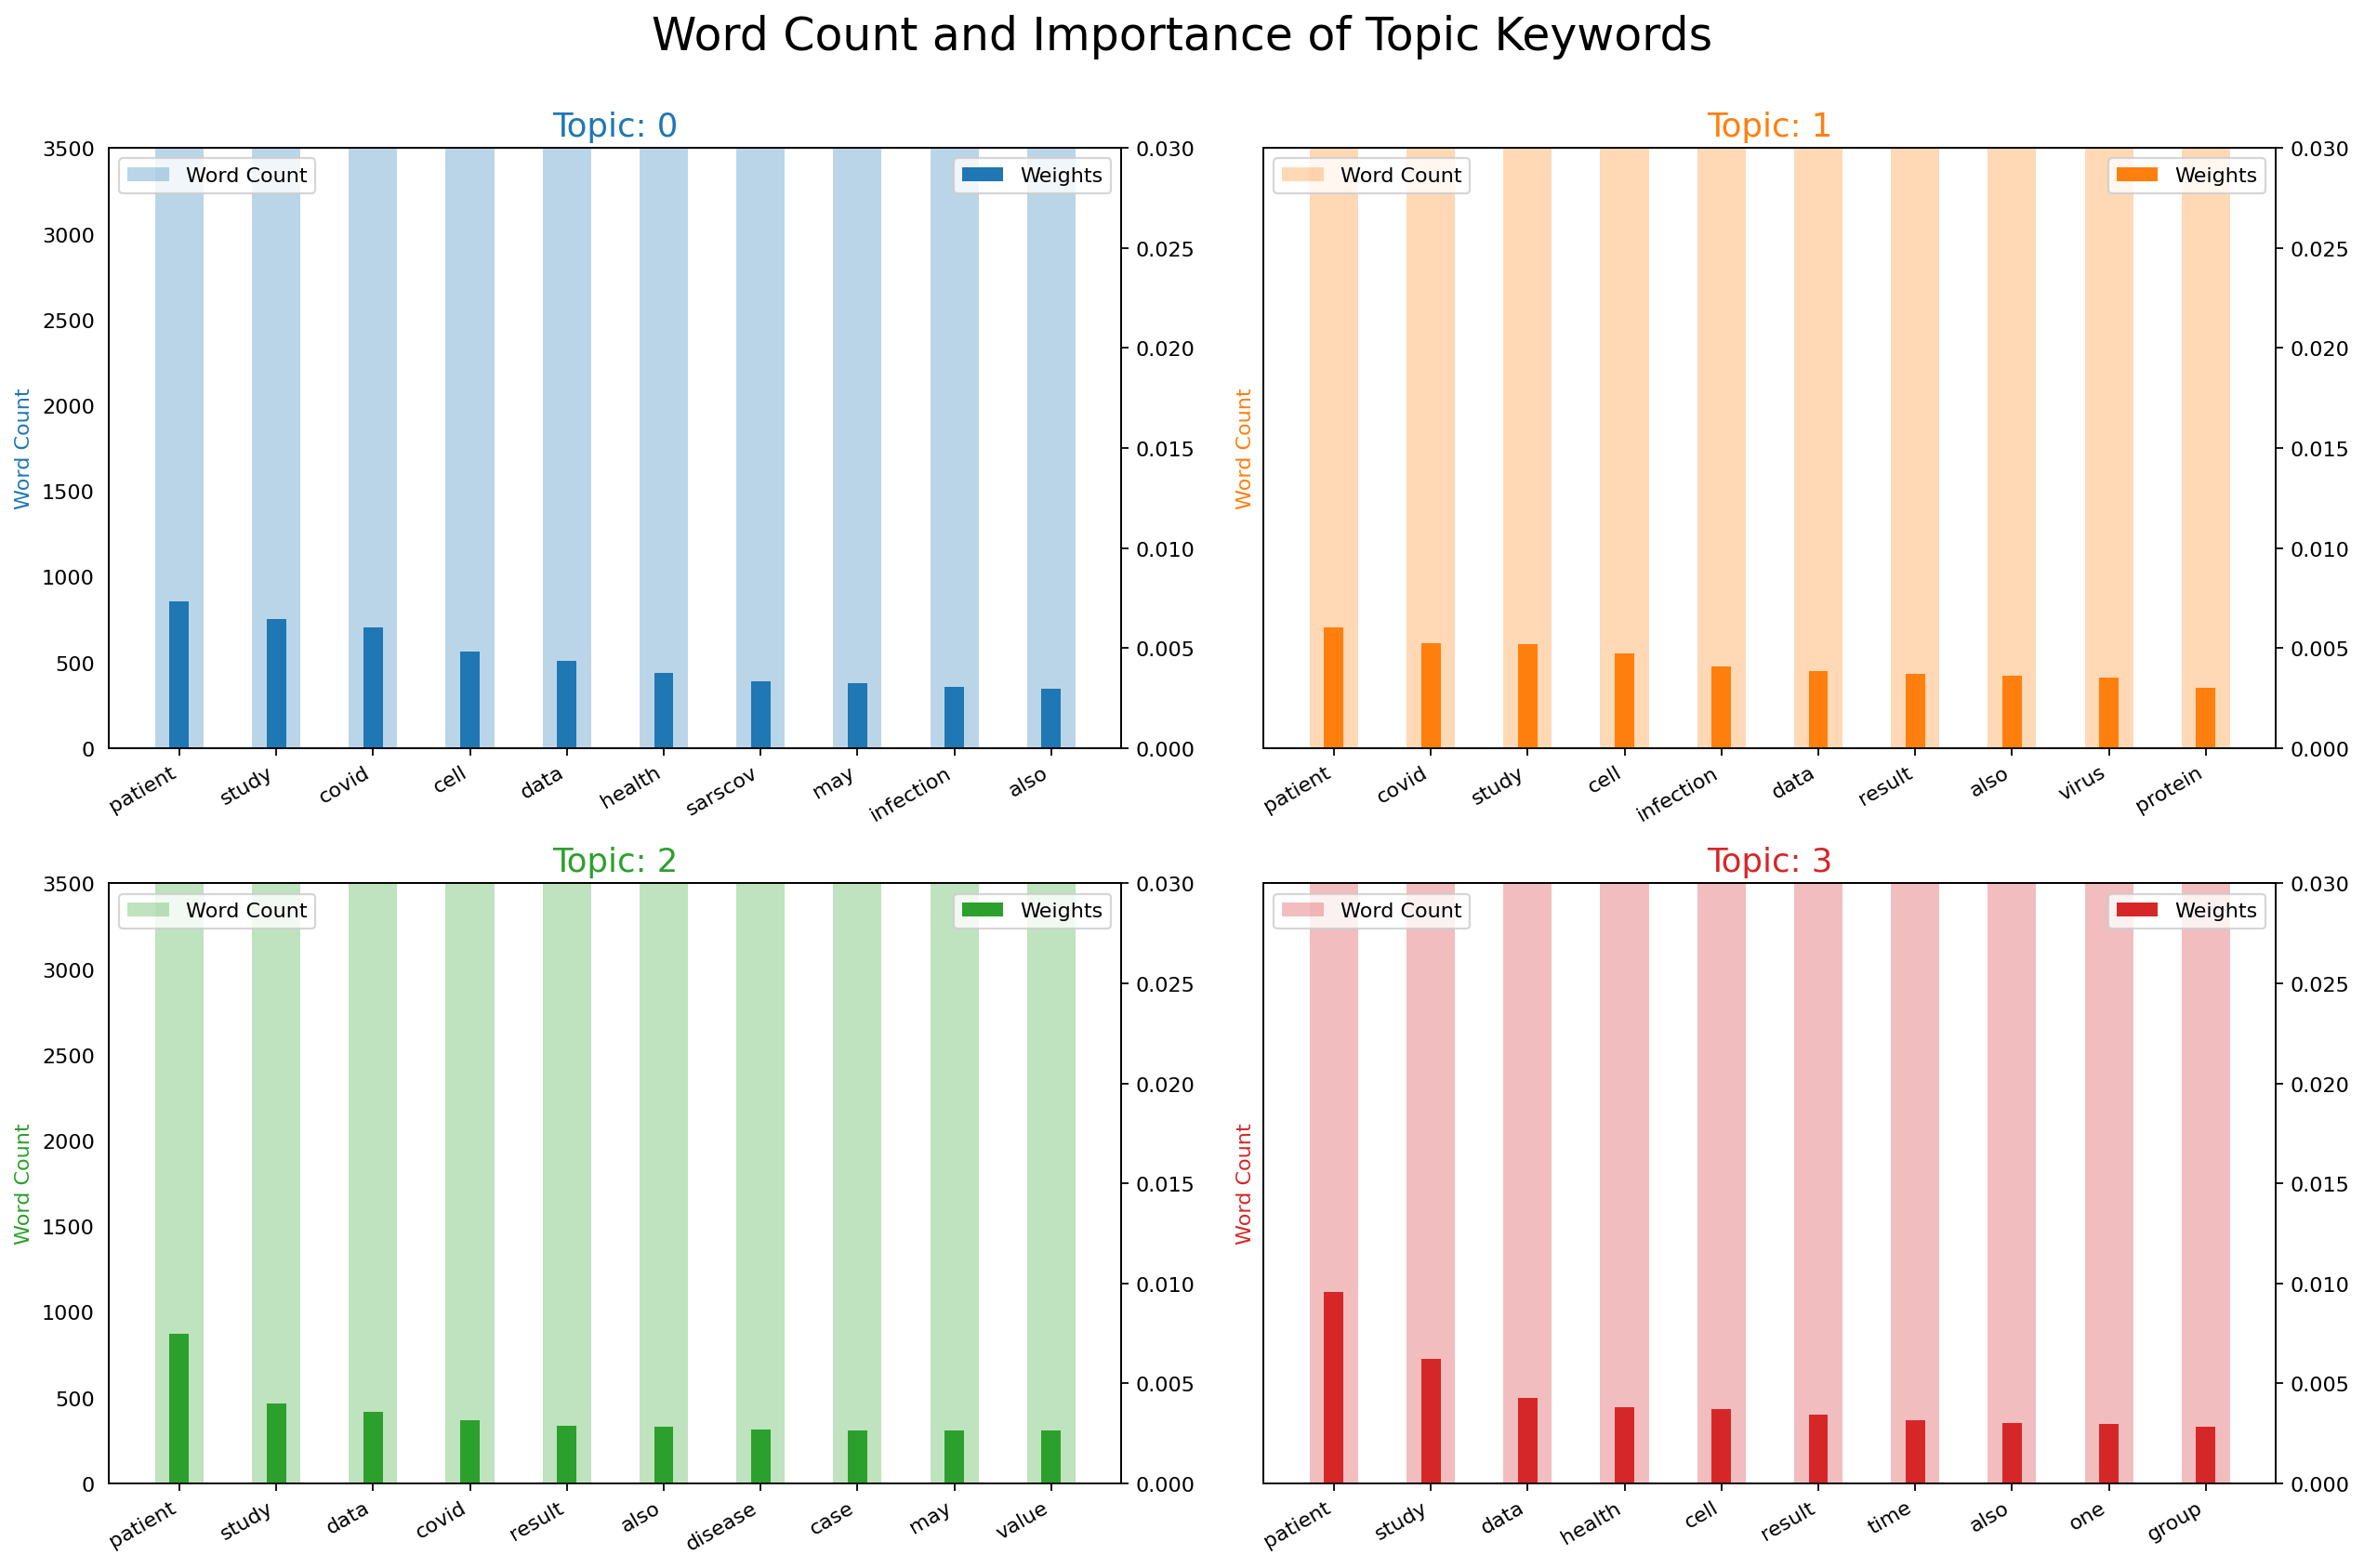

In [57]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In this section we make use of pyLDAvis to visualize the information contained in a topic model.

In [44]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [45]:
!pip install pyLDAvis


     |████████████████████████████████| 1.7 MB 3.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=390240cbc3f36e0a0ff2d1e375d704af0c51019b4e4cd2cd29fcc956b710190c
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [46]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle 

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [47]:
# Reference - https://medium.com/@nqabell89/visualizing-unsupervised-text-classification-output-with-pyldavis-370c1784ed58

pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.003101  0.008760       1        1  22.705212
6      0.006915 -0.000410       2        1  15.908759
3      0.006584  0.006604       3        1  15.010127
4      0.004509 -0.010627       4        1  10.878712
1      0.010579 -0.002195       5        1   8.078276
5     -0.002358 -0.001987       6        1   7.440559
8     -0.007449  0.000978       7        1   6.232661
7     -0.011359  0.000380       8        1   5.012872
0     -0.003411 -0.000121       9        1   4.706676
2     -0.007112 -0.001382      10        1   4.026146, topic_info=           Term          Freq         Total Category  logprob  loglift
723     patient  16075.000000  16075.000000  Default  30.0000  30.0000
680       covid  10768.000000  10768.000000  Default  29.0000  29.0000
3940         de   2743.000000   2743.000000  Default  28.0000  28.0000
1044     health   6069.000000   6069.000000  Default  27.0000  27.0000
556       study  14002.000000  14002.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
1148      level    178.526877   5164.622984  Topic10  -6.2162  -0.1525
138         day    166.545617   4244.338398  Topic10  -6.2856  -0.0257
868        cell    191.815892   8871.171396  Topic10  -6.1444  -0.6217
300   infection    177.224399   6362.090649  Topic10  -6.2235  -0.3683
1044     health    169.209461   6069.047853  Topic10  -6.2698  -0.3675

[931 rows x 6 columns], token_table=       Topic      Freq Term
term                       
17405      1  0.104882  aan
17405      2  0.139843  aan
17405      3  0.034961  aan
17405      4  0.104882  aan
17405      5  0.034961  aan
...      ...       ...  ...
61572      6  0.057494  χco
61572      7  0.057494  χco
61572      8  0.057494  χco
61572      9  0.057494  χco
61572     10  0.057494  χco

[4172 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 7, 4, 5, 2, 6, 9, 8, 1, 3])